In [1]:
import sys
import base64
import logging.config

import wordninja

import pandas as pd
import numpy as np

from bisect import bisect_left
from itertools import permutations
from collections import Counter, defaultdict
from itertools import product
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
%matplotlib inline

log_config = {
    'version': 1,
    'disable_existing_loggers': False,
    'formatters': {
        'default': {
            'format': '%(asctime)s - (%(name)s) - [%(levelname)s] - %(message)s\n'
        },
    },
    'handlers': {
        'console': {
            'class': 'logging.StreamHandler',
            'level': 'DEBUG',
            'formatter': 'default',
            'stream': 'ext://sys.stdout'
        },
    },
    'loggers': {
        '': {
            'level': 'INFO',
            'handlers': ['console', ],
            'propagate': False,
        },
    }
}

logging.config.dictConfig(log_config)
LOGGER = logging.getLogger('crypto')

In [2]:
_aplhas = 'abcdefghijklmnopqrstuvwxyz'
ALPHA = set(_aplhas) | set(_aplhas.upper())

# Task 00

In [3]:
s = "VDJzc0lHRjBJR3hsWVhOMElHNXZkeUI1YjNVZ2MyVmxJSFJvWVhRZ2FYUW5jeUJoWW5OdmJIVjBaV3g1SUhCdmFXNTBiR1Z6Y3lCMGJ5QjBjbmtnZEc4Z2FXNTJaVzUwSUhsdmRYSWdiM2R1SUNKamNubHdkRzhpSUhkcGRHZ2daWGh3WldOMFlYUnBiMjV6SUhSb1lYUWdhV1lnYzI5dFpXOXVaU0JrYjJWemJpZDBJR3R1YjNjZ2RHaGxJR0ZzWjI5eWFYUm9iU0FvWlhabGJpQjBkMmxqWlNCMGFHVWdZbUZ6WlRZMExDQjNhR2xqYUNCcGN5QndjbVYwZEhrZ2MzUjFjR2xrS1NCcGRDZHpJR2x0Y0c5emMybGliR1VnWm05eUlHaHBiU0IwYnlCa1pXTnBjR2hsY2k0Z1dXOTFKM0psSUhKbFlXUnBibWNnZEdocGN5QnViM2NnYVc0Z2NHeGhhVzRnZEdWNGRDQnpieUIwYUdGMElHRnlaM1Z0Wlc1MElHTnNaV0Z5YkhrZ1ptRnNiSE1nYzJodmNuUXVDazV2ZHlCMGFHVWdZV04wZFdGc0lIUmhjMnR6T2dveExpQlhjbWwwWlNCaElIQnBaV05sSUc5bUlITnZablIzWVhKbElIUnZJR0YwZEdGamF5QnphVzVuYkdVdFlubDBaU0JZVDFJZ1kybHdhR1Z5SUhkb2FXTm9JR2x6SUhSb1pTQnpZVzFsSUdGeklFTmhaWE5oY2lCaWRYUWdkMmwwYUNCNGIzSWdiM0F1Q2pJdUlGMThaRE5uWVdvemNqTmhkbU4yY21kNmZYUStlSFpxTTB0Y1FUTndlbU43ZG1FOU0xWTlkRDB6ZW1jellIdDhaaTUzTTJkeWVIWXpjak5nWjJGNmZYUXpNWHQyTGk1OE0yUjhZUzUzTVROeWZYYy9NM1I2WlhaOU0yZDdkak40ZG1vemVtQXpNWGgyYWpFL00ydDhZVE5uZTNZemRYcGhZR2N6TG5ablozWmhNekY3TVROa2VtZDdNekY0TVQ4elozdDJmVE5yZkdFek1YWXhNMlI2WjNzek1YWXhQek5uZTNaOU16RXVNVE5rZW1kN016RnFNVDh6Y24xM00yZDdkbjB6YTN4aE0zMTJhMmN6Y0h0eVlUTXhMakV6WkhwbmV6TXhlREV6Y25SeWVuMC9NMmQ3ZG4wek1Yd3hNMlI2WjNzek1YWXhNM0o5ZHpOZ2ZETjhmVDB6U254bU0zNXlhak5tWUhZemVuMTNkbXN6ZkhVemNIeDZmWEI2ZDNaOWNIWS9NMXR5Zm41NmZYUXpkM3BnWjNKOWNIWS9NMWh5WUhwZ2VIb3pkbXR5Zm5wOWNtZDZmSDAvTTJCbmNtZDZZR2Q2Y0hJdU0yZDJZR2RnTTN4aE0yUjdjbWQyWlhaaE0zNTJaM3Q4ZHpOcWZHWXpkWFoyTGpOa2ZHWXVkek5nZTN4a00yZDdkak54ZG1Cbk0yRjJZR1l1WnowS015NGdNV00wTVRBeU0yWTFOalJpTW1FeE16QTRNalExTnpCbE5tSTBOekEwTm1JMU1qRm1NMlkxTWpBNE1qQXhNekU0TWpRMVpUQmxObUkwTURBeU1qWTBNekEzTW1VeE16RTRNMlUxTVRFNE0yWTFZVEZtTTJVME56QXlNalExWkRSaU1qZzFZVEZpTWpNMU5qRTVOalV4TXpObU1qUXhNekU1TW1VMU56RmxNamcxTmpSaU0yWTFZakJsTm1JMU1EQTBNalkwTXpBM01tVTBZakF5TTJZMFlUUmlNalExTlRSaU0yWTFZakF5TXpneE16QTBNalUxTmpSaU0yTTFOalJpTTJNMVlUQTNNamN4TXpGbE16ZzFOalJpTWpRMVpEQTNNekl4TXpGbE0ySTBNekJsTXprMU1EQmhNemcxTmpSaU1qYzFOakZtTTJZMU5qRTVNemd4WmpSaU16ZzFZelJpTTJZMVlqQmxObUkxT0RCbE16STBNREZpTW1FMU1EQmxObUkxWVRFNE5tSTFZekExTWpjMFlUUmlOemt3TlRSaE5tSTJOekEwTm1JMU5EQmxNMll4TXpGbU1qTTFZVEU0Tm1JMVl6QTFNbVV4TXpFNU1qSTFOREF6TTJZeE16QmhNMlUwTnpBME1qWTFNakZtTWpJMU1EQmhNamMxWmpFeU5tSTBZVEEwTTJVeE16RmpNakkxWmpBM05tSTBNekU1TWpRMU1UQmhNamsxWmpFeU5tSTFaREJsTW1VMU56UmlNMlkxWXpSaU0yVTBNREJsTm1JME1EQTBNalkxTmpSaU16ZzFZekU1TTJZeE16QTBNbVF4TXpCak1tVTFaREJsTTJZMVlUQTRObUkxTWpBM01tTTFZekU1TWpJME56QXpNall4TXpRek0yTTFZakF5TWpnMVlqUmlNMk0xWXpFNU1qQTFOakJtTm1JME56QXpNbVV4TXpBNU1tVTBNREZtTm1JMVpqQmhNemcwTnpSaU16STFOakJoTXpreFlUUTNObUkwTURBeU1qWTBOakEzTW1FME56QmxNbVl4TXpCaE1qVTFaREJsTW1FMVpqQXlNalUxTkRSaU1qUTBNVFJpTW1NME1UQmhNbVkxWVRCbE1qVTBOelJpTW1ZMU5qRTRNamcxTmpBMU0yWXhaRFJpTVRnMU5qRTVNakkxWXpGbE16ZzFaakV5TmpjeE16RmpNemsxWVRGbU1tVXhNekF5TTJZeE16RTVNakkxTkRBek0yWXhNekExTWpRME5EUTNObUkwWVRBME0yVXhNekZqTWpJMVpqQTNObUkxWkRCbE1tVTFOelJpTWpJME56UmlNMlkxWXpSaU1tWTFOakE0TWpJME16QXpNbVUwTVRSaU0yWTFZakJsTm1JMVpEQmxNek0wTnpSaU1qUTFaREJsTm1JMU1qRTRObUkwTkRCbE1qYzFaalExTm1JM01UQmxNbUUwTVRSaU1qSTFaRFJpTWpZMVlUQTFNbVl4WmpSaU0yWTFZakJsTXprMU5qZzVZMkpoWVRFNE5tSTFaREEwTm1JME1ERmlNbUUxTURCbE16Z3haRFl4Q2pRdUlFVkdSbEJSVEVWTFZsUldVRU5RV1VaTVRWWklVVXhWUlZkRFRsWlhSbGxIU0ZsVVEwVlVTRkZGUzB4UVZrMVRRVXRUVUZaUVFWQldXVmROVmtoUlRGVlRVRkZNV1ZkTVFWTk1SbFpYVUZGTVRWWklVVXhWVUV4U1VGTlJURlZNVVVWVFVFSk1WMUJEVTFaU1ZsZEdURWhNVjBaTVYxQlZSVmRHV1U5VVEwMVJXVk5NVjA5WlYxbEZWRWhSUlV0TVVGWk5VMEZMVTFCV1VFRlFWbGxYU0VWUVVFeFZWMU5IV1ZWTVJVMVJWRXhRVUV4VlIxVlpUMHhYUkZSV1UxRkZWRWhSUlV0TVVGWlFWbE5OVkV4RlZWQlJSVkJEV1VGTlJWZFhXVTlaVlV4VlRGUkRXVmRRVVV4VFJVOU1VMVpQU0ZSTVZWbEJVRlpYVEZsSFJFRk1VMU5XVjBSUVVVeE9URU5MUTB4U1VVVkJVMUJXU1V4VFRFVlZUVkZDVVZaTlVVTlpRVWhWV1V0RlMxUkRRVk5NUmxCWlJreE5Wa2hSVEZWSVZVeEpWbGxCVTBoRlZVVkVWVVZJVVVKV1ZGUlFVVXhXVjBaTVVsbEhUVmxXVjAxV1JreFhUVXhUVUZaVVZFSlpWVTVGVTBWVFFVUkVURk5RVmxsWFExbEJUVVZYVUZWRFVGbEdWa2xXUmt4UVVVeFBURk5UUlVSTVZsZElSVlZRVTB0RFVGRk1WMEZQUzB4VldVZE5VVVZWUlUxUVRGVlRWbGRGVGt4RFJWZEdSVWhJVkVOSFZVeFlRVXhYVFVORlYwVlVRMU5XVTFCWlRFVk5VVmxIVUZGTVQwMUZWME5aUVVkV1YwWkZRa1ZEVUZsQlUweFJWa1JSVEZWWlZVWk1WVWRWVEZoQlRGZE5RMU5RUlZCV1UxQldUVk5DVmxCUlVGRldVMUJEU0V4WlIwMVdTRkZNVlZCUlRGZE1VbEJJUlZWRlJGVkZTRkZOV1ZkUVJWWlhVMU5aVDB4SVZVeFFVRU5XVjFCTVZVeFRVRlpYUkZaWFIxbFZUMFZRVmxsWFJVdFpRVkJUV1U5TVJVWkdWbEJXV1ZkRlZGVk1Ra1ZWUmdvMUxpQk5WVXhFUTB4YVYwdE1XbFJYVkZoSVNrTllSVVJSVEVoTVdFbElRa3hNU2tSUlYwaEVVVlZhVTA5Q1EwdE5SVXRYV0ZKQlFsVkhRVVJSV2s5Q1RGRk9UbGhOU2xOWldFUlhXVnBHVGt0SlRrVlZTVU5PU2s1SVUxVlVWRTVSV2xSUlRrZEdRMWxaU2tOT1JVRk9UbGhJVGt0VFFVUlJXbFpFVTBWRVEweFNVMWRTV2xOQlVVMUdUVmhQU2xOWlEwWlRXVVZVVTFGYVUwSlBVMDVOVTBsV1RrTkNRMWRTV0ZaQ1IwbENRVWRMUmsxTVdsUlhWRUpDUmxWUFNrVlRTVWxDUjBWUVFsSk9RVXROV1ZSWlQxTkRWMVJhVTBKWlUxQkRRMXBHUTAxQ1FsaFVTVlZDVTFoVVRrMUZUbEpPUzBGRVVWSkdRMWxSV2xaTVMwWlZXbGxhVGs1S1drMVpTMDlPVlV0R1YwRkhSa05aV1VwVlExRk9UbGxUUTBWT1FsWkxUbFJUVjA5VFMwTk5Va2hHV1ZsS1MweFlTRVZEVTB0Q1drbEJTMHBUU0VwT1MxZE5RVmRHVTA1WVNGZFNTVU5aV1ZsS1JWTkpTVUpaV1ZSR1NFVk9UazVNUzBOTlVraENUMXBLV2xsSlRrUklUMFpHV1ZwVFFrdEZVRmxPV0VoV1ZVNUxSRlJFU2s1YVNVaEtVVWxIUlVoVFZsZElWMXBMUlZsYVNVNWFWRTFIU1ZaS1RsRk9RVmxPU0VGSVNVbENVVmhHVVU1YVNrMUxURlJNV0ZOT1RsVk5VRUZYVTBoS1RrTlFWa1ZhV2xOTVMwOU9RME5hVWt4WFFrTlZUMGhLVGxGVVZFdGFVVUZUVTB0T1EwSkRVVU5ZVGtWT1MwRkNUMVJHUTA5WVIwUlVUbHBMU0ZkTFNreE1SRUpQUTFORVUwVkxUazVSVGtsT1IwWkRUbE5EVFZOWFZrNURRa05SVGtWRFFWUkVRVUpSV0V0WFJFWlVVMHhhVkZkVVdFWlZTRk5JVGs1UlRrRlVRMEZZVDFOUlZsVk9SMFJOVkZwVFdWcEdSazVGVUUxTFIwWkRURlJhVmxsQ1YwWk9WVU5YV2t4V1MweEpRMDVPU2toRVdWcGFUVUZGVGxaVlRrdEVWRVJYUWxGWVRsZEVVMFZYVTAxT1YxTlRWVUpVVWxORFRGaEtSbEpSUmxGWldVcExURmhJUlV4UldsUlRSVlpLUlZGR1IwTk5WRk5RV2xOQ1JWRkdWRk5GUjFKRFdsTkZWVmhPUVVwTFNrVklSVlJUV1ZOWlRrVlpVRVJSVTA1WlZWTk9VMVZhUjBSQlUxUk9WRUpJUkZoYVJsRk1XbFJOVEV4UlJsVlBTa1ZUVTFaRFZVTktSbEZKUTFSYVFrTk9TMDVRVGt4WVJVSklTd28yTGlCRVUwMWFUVUZEV0ZwTVNFZFdVa1JXVWtGYVRVcFNRVWRGVmtKRlExUlBTMXBKVFVGU1ZsWkRTRlphVWxSQlJFVkRUVmxGV0ZCWlNrZFBTRUZaVkVwRFVrcFdSMUpKVmt4UFIxUkZWVUZLVEVaU1ZGVlBWVkpIV2toT1VrNVpUVU5NV0VkVFNGWkhRa3BaVVUxTlEwcElSRVJVUVZoRlNFNVVVbFJLUzBwTlZWbEtVa1ZGVWxSTVUwZElUVUZTVlZOUlZrMVdSMWxaVFZaU1IwTkZWVWxPU0VkRlJWVktTMDlTVVVwRFJGbE9RMEphVTBGVFZWVkNRMDlGVVZOWlNGSlpTRk5EVkV0RFUwaEhWRkZTU2tOWVYwNUtTVUZNV1VSVFIwaE5RVkpaUjBGV1QxcFJURXBGVGxkUVZrSlZTVTVMUjBOV1RFRk1WVU5ZU2xoSFNFaFNVbE5TVkVWTVVrTlRXVk5CVWtkV1dWVldRMU5JV0ZWTldWUlZSMDFOUlU1U1NVcE5SRXBMUVV4T1NWVlVVMVZEVWtwSFRVaEhVazlTU0U1S1RVOURSVWhKVms1RldVUk9XVVZKVFZaV1RsSlVXRTFOVWxoQlNFNVRWVVZHVEU5RldFUk5VRWxNUTFkRFRVVldURlZKVFZSR1VFTmFWMDFEVEZGU1RsaFRXbEJOVFVsUlNGTkVWVlpXVFVGVFFVWllVMXBLVjFKRVZGVk5WVWxHUkZwSVNsUllTRTlCVWtGSFJGWk1UazFSVFZoQ1JreFBURk5JVFVwSFdrMVFWa2RWUVZSV1RGcFFXVXhWUlUxSFNWWktUMWhCUjA5SVVFbE1SVk5GUVVOWVYwNUtWa2REU2tOUlRVMVBVbFJXVFZOV1FWaFpTbFpDU0ZKWlEwOVdTRk5EVEZoSFVrcEhUMGhCVmt4VlMxRlBWVXhJU0ZKT1dFMUJUVlZNU1V0V1ZFaFRVVUZNVGtWQlNrOWFWMDFEVEVaQ1JWSlBWVVpWVlV4WVNFMUJRMFJGVlZSVFZWSlJTbEpCVFVSV1JGcFZVRVpKVmxOSVEwZEVRMFJJVWtGS1RrRkhSRlZRUVVoRVJWVlVVMVZYUTBWRFZsSlNTa3hhVTFOTlFscEtVMVJCVlVST1dGVlJWazVHVTBwSlMxbE5Ua1JaVWtGT1NVTllTVTFhVFVwSFQwaFVXVWRGVFZWVVZrOUlTRTlNV2xCTlNsUlZSMGRNVlZoWVRsZFRRVWxOUTFSS1RrdFdURmxIVmxsQlZGbFJXRVJIU0UxU1ZGaE5SMUpSVFVSTlEwUlBVazVYVTBOU1dVcEhUMUpSVDBsSlFsVkdXVlZEVkZaTVdVTlRWa2RQVWxSRlIxbElVMVpOVlVkTldFUktTRTFTV0ZWQ1EwOUZRVWhPVTA5TlIxbFdRbFZSV0VoSFIwaEVTRUZKU0ZOQlExaERUa3hUUzAxUFdVdEVTVkZLU0ZoYVdVTk1SVWhYVmxSVlExUldURnBLVGtwUlIwSlhVa3hTUTFaQlFscEtUVlJWUVVoS1VrcFdWMVZCUjFSRVRVTlNRMDFDU1UxV1RWTkRWRlZEVjBoSFZGQkpTa2RhV1V4UVUwcElSMWxXVDBoVFdWUkdTRU5JVlZoWFNWWk1RbFpWVWxGWVRWbFNVVVpEVFVGU1ZVbExWa3haUTFWVVJsaEdTMUpTUlVoTlFWSkdRMDFCVWxCV1RrNVNXbFZEVkV4V1ZrTklURlpJUjBOSVdFMU1WVWhWUlZWQlExaE5WVUZEV0ZkTlFVTkdWVkJJVEVGRFdVZEtRa2RZU0ZOVlNVdFdURlZIVTFaTVdFZFJTbEZVU1VwV1JFNVRVVlpIVDBoTlNrbEhTRTFNV1VkYVRVZFRRa2RZU0ZOV1ZreEJTMXBIU0VwR1JGcElWazFZVjFkUVRGWkRWVVpMVGxkRFFsTk9WVTlPUVZoSFVVbENXRTFaVEZOSlNGRkJVbEpOVlVsTFdGVk9Sa3RFVFZGRFZFOU5VVkJWVFZwUlNsRkNSa3RKVFZoTldVeEpWazFIVEVsTldsUlVTMWhOVlVoU1FVaE5RVWxPU1ZwV1RFNVhUa1JWVFZwRFZFdFdRMDFEUkVKUVJVRlNRVWhOUkZOT1YwNUtXRUZDUTA5RlJGVlFRVkpWUVZWSVIxRkRWRlpNVGxWUFRsSkJTRTFFUTBSR1MwSlRSRlZaVmxSS1NWVkVWVUZOVEVSSVZsWkpVa0pQU0ZORVRGWlhWUT09"


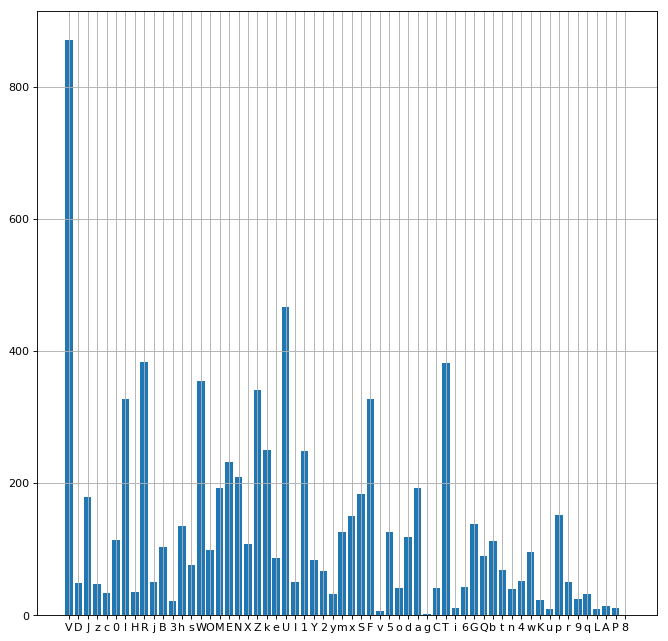

In [4]:
plt.figure(figsize=(10, 10), dpi=80)
letter, freq = zip(*Counter(s).items())
plt.bar(letter, freq)
plt.grid()

In [5]:
b64_s = base64.b64decode(s)
b64_s.decode('utf-8')

'T2ssIGF0IGxlYXN0IG5vdyB5b3Ugc2VlIHRoYXQgaXQncyBhYnNvbHV0ZWx5IHBvaW50bGVzcyB0byB0cnkgdG8gaW52ZW50IHlvdXIgb3duICJjcnlwdG8iIHdpdGggZXhwZWN0YXRpb25zIHRoYXQgaWYgc29tZW9uZSBkb2Vzbid0IGtub3cgdGhlIGFsZ29yaXRobSAoZXZlbiB0d2ljZSB0aGUgYmFzZTY0LCB3aGljaCBpcyBwcmV0dHkgc3R1cGlkKSBpdCdzIGltcG9zc2libGUgZm9yIGhpbSB0byBkZWNpcGhlci4gWW91J3JlIHJlYWRpbmcgdGhpcyBub3cgaW4gcGxhaW4gdGV4dCBzbyB0aGF0IGFyZ3VtZW50IGNsZWFybHkgZmFsbHMgc2hvcnQuCk5vdyB0aGUgYWN0dWFsIHRhc2tzOgoxLiBXcml0ZSBhIHBpZWNlIG9mIHNvZnR3YXJlIHRvIGF0dGFjayBzaW5nbGUtYnl0ZSBYT1IgY2lwaGVyIHdoaWNoIGlzIHRoZSBzYW1lIGFzIENhZXNhciBidXQgd2l0aCB4b3Igb3AuCjIuIF18ZDNnYWozcjNhdmN2cmd6fXQ+eHZqM0tcQTNwemN7dmE9M1Y9dD0zemczYHt8Zi53M2dyeHYzcjNgZ2F6fXQzMXt2Li58M2R8YS53MTNyfXc/M3R6ZXZ9M2d7djN4dmozemAzMXh2ajE/M2t8YTNne3YzdXphYGczLnZnZ3ZhMzF7MTNkemd7MzF4MT8zZ3t2fTNrfGEzMXYxM2R6Z3szMXYxPzNne3Z9MzEuMTNkemd7MzFqMT8zcn13M2d7dn0za3xhM312a2czcHtyYTMxLjEzZHpnezMxeDEzcnRyen0/M2d7dn0zMXwxM2R6Z3szMXYxM3J9dzNgfDN8fT0zSnxmM35yajNmYHYzen13dmszfHUzcHx6fXB6d3Z9cHY/M1tyfn56fXQzd3pgZ3J

In [6]:
task = base64.b64decode(b64_s).decode('utf-8')
print(task)

Ok, at least now you see that it's absolutely pointless to try to invent your own "crypto" with expectations that if someone doesn't know the algorithm (even twice the base64, which is pretty stupid) it's impossible for him to decipher. You're reading this now in plain text so that argument clearly falls short.
Now the actual tasks:
1. Write a piece of software to attack single-byte XOR cipher which is the same as Caesar but with xor op.
2. ]|d3gaj3r3avcvrgz}t>xvj3K\A3pzc{va=3V=t=3zg3`{|f.w3grxv3r3`gaz}t31{v..|3d|a.w13r}w?3tzev}3g{v3xvj3z`31xvj1?3k|a3g{v3uza`g3.vggva31{13dzg{31x1?3g{v}3k|a31v13dzg{31v1?3g{v}31.13dzg{31j1?3r}w3g{v}3k|a3}vkg3p{ra31.13dzg{31x13rtrz}?3g{v}31|13dzg{31v13r}w3`|3|}=3J|f3~rj3f`v3z}wvk3|u3p|z}pzwv}pv?3[r~~z}t3wz`gr}pv?3Xr`z`xz3vkr~z}rgz|}?3`grgz`gzpr.3gv`g`3|a3d{rgveva3~vg{|w3j|f3uvv.3d|f.w3`{|d3g{v3qv`g3av`f.g=
3. 1c41023f564b2a130824570e6b47046b521f3f5208201318245e0e6b40022643072e13183e51183f5a1f3e4702245d4b285a1b23561965133f2413192e571e28564b3f5b0e6b50042643

# Task 01

In [7]:
task_2_encoded = "]|d3gaj3r3avcvrgz}t>xvj3K\A3pzc{va=3V=t=3zg3`{|f.w3grxv3r3`gaz}t31{v..|3d|a.w13r}w?3tzev}3g{v3xvj3z`31xvj1?3k|a3g{v3uza`g3.vggva31{13dzg{31x1?3g{v}3k|a31v13dzg{31v1?3g{v}31.13dzg{31j1?3r}w3g{v}3k|a3}vkg3p{ra31.13dzg{31x13rtrz}?3g{v}31|13dzg{31v13r}w3`|3|}=3J|f3~rj3f`v3z}wvk3|u3p|z}pzwv}pv?3[r~~z}t3wz`gr}pv?3Xr`z`xz3vkr~z}rgz|}?3`grgz`gzpr.3gv`g`3|a3d{rgveva3~vg{|w3j|f3uvv.3d|f.w3`{|d3g{v3qv`g3av`f.g="


In [8]:
def xor_cipher(data, key): 
    return ''.join(list(chr(ord(a) ^ ord(key)) for a in data))

## Manual

There are to many '3', so I supposed that this is encoding of spaces.

In [9]:
key_guess = chr(ord('3') ^ ord(' '))
key_guess

'\x13'

In [10]:
task2_decoded = xor_cipher(task_2_encoded, key_guess)
task2_decoded

'Now try a repeating-key XOR cipher. E.g. it shou=d take a string "he==o wor=d" and, given the key is "key", xor the first =etter "h" with "k", then xor "e" with "e", then "=" with "y", and then xor next char "=" with "k" again, then "o" with "e" and so on. You may use index of coincidence, Hamming distance, Kasiski examination, statistica= tests or whatever method you fee= wou=d show the best resu=t.'

In [11]:
task2_decoded = task2_decoded.replace('=', 'l')
task2_decoded

'Now try a repeating-key XOR cipher. E.g. it should take a string "hello world" and, given the key is "key", xor the first letter "h" with "k", then xor "e" with "e", then "l" with "y", and then xor next char "l" with "k" again, then "o" with "e" and so on. You may use index of coincidence, Hamming distance, Kasiski examination, statistical tests or whatever method you feel would show the best result.'

## Auto 

In [15]:
def symbol_quality_index(s):
    return sum(x in ALPHA for x in s)

In [16]:
def xor_cipher_decoder(encoded_str):
    LOGGER.info(f'Got encipted string: {encoded_str}')
    LOGGER.info(f'Hacking single-byte XOR cipher')
    
    best_decoding = ''
    best_key = None
    
    for key in range(255):
        decoded_candidate = xor_cipher(encoded_str, chr(key))
        
        if symbol_quality_index(decoded_candidate) > symbol_quality_index(best_decoding):
            best_decoding = decoded_candidate
            best_key = key
            
    LOGGER.info(f'Decription key: {chr(key)}')
    LOGGER.info(f'Decripted text: {best_decoding}')
    
    return best_decoding, best_key

In [17]:
_ = xor_cipher_decoder(task_2_encoded)

2018-09-30 19:43:43,414 - (crypto) - [INFO] - Got encipted string: ]|d3gaj3r3avcvrgz}t>xvj3K\A3pzc{va=3V=t=3zg3`{|f.w3grxv3r3`gaz}t31{v..|3d|a.w13r}w?3tzev}3g{v3xvj3z`31xvj1?3k|a3g{v3uza`g3.vggva31{13dzg{31x1?3g{v}3k|a31v13dzg{31v1?3g{v}31.13dzg{31j1?3r}w3g{v}3k|a3}vkg3p{ra31.13dzg{31x13rtrz}?3g{v}31|13dzg{31v13r}w3`|3|}=3J|f3~rj3f`v3z}wvk3|u3p|z}pzwv}pv?3[r~~z}t3wz`gr}pv?3Xr`z`xz3vkr~z}rgz|}?3`grgz`gzpr.3gv`g`3|a3d{rgveva3~vg{|w3j|f3uvv.3d|f.w3`{|d3g{v3qv`g3av`f.g=

2018-09-30 19:43:43,415 - (crypto) - [INFO] - Hacking single-byte XOR cipher

2018-09-30 19:43:43,472 - (crypto) - [INFO] - Decription key: þ

2018-09-30 19:43:43,473 - (crypto) - [INFO] - Decripted text: Now try a repeating-key XOR cipher. E.g. it shou=d take a string "he==o wor=d" and, given the key is "key", xor the first =etter "h" with "k", then xor "e" with "e", then "=" with "y", and then xor next char "=" with "k" again, then "o" with "e" and so on. You may use index of coincidence, Hamming distance, Kasiski examin

# Task 02 (Vigenere Cipher)

In [18]:
task_3_encoded = "1c41023f564b2a130824570e6b47046b521f3f5208201318245e0e6b40022643072e13183e51183f5a1f3e4702245d4b285a1b23561965133f2413192e571e28564b3f5b0e6b50042643072e4b023f4a4b24554b3f5b0238130425564b3c564b3c5a0727131e38564b245d0732131e3b430e39500a38564b27561f3f5619381f4b385c4b3f5b0e6b580e32401b2a500e6b5a186b5c05274a4b79054a6b67046b540e3f131f235a186b5c052e13192254033f130a3e470426521f22500a275f126b4a043e131c225f076b431924510a295f126b5d0e2e574b3f5c4b3e400e6b400426564b385c193f13042d130c2e5d0e3f5a086b52072c5c192247032613433c5b02285b4b3c5c1920560f6b47032e13092e401f6b5f0a38474b32560a391a476b40022646072a470e2f130a255d0e2a5f0225544b24414b2c410a2f5a0e25474b2f56182856053f1d4b185619225c1e385f1267131c395a1f2e13023f13192254033f13052444476b4a043e131c225f076b5d0e2e574b22474b3f5c4b2f56082243032e414b3f5b0e6b5d0e33474b245d0e6b52186b440e275f456b710e2a414b225d4b265a052f1f4b3f5b0e395689cbaa186b5d046b401b2a500e381d61"


In [19]:
sorted(Counter(task_3_encoded).items())

[('0', 89),
 ('1', 76),
 ('2', 100),
 ('3', 84),
 ('4', 95),
 ('5', 96),
 ('6', 55),
 ('7', 33),
 ('8', 28),
 ('9', 18),
 ('a', 31),
 ('b', 68),
 ('c', 21),
 ('d', 13),
 ('e', 44),
 ('f', 43)]

In [20]:
task_3_encoded = bytearray.fromhex(task_3_encoded)
task_3_encoded

bytearray(b'\x1cA\x02?VK*\x13\x08$W\x0ekG\x04kR\x1f?R\x08 \x13\x18$^\x0ek@\x02&C\x07.\x13\x18>Q\x18?Z\x1f>G\x02$]K(Z\x1b#V\x19e\x13?$\x13\x19.W\x1e(VK?[\x0ekP\x04&C\x07.K\x02?JK$UK?[\x028\x13\x04%VK<VK<Z\x07\'\x13\x1e8VK$]\x072\x13\x1e;C\x0e9P\n8VK\'V\x1f?V\x198\x1fK8\\K?[\x0ekX\x0e2@\x1b*P\x0ekZ\x18k\\\x05\'JKy\x05Jkg\x04kT\x0e?\x13\x1f#Z\x18k\\\x05.\x13\x19"T\x03?\x13\n>G\x04&R\x1f"P\n\'_\x12kJ\x04>\x13\x1c"_\x07kC\x19$Q\n)_\x12k]\x0e.WK?\\K>@\x0ek@\x04&VK8\\\x19?\x13\x04-\x13\x0c.]\x0e?Z\x08kR\x07,\\\x19"G\x03&\x13C<[\x02([K<\\\x19 V\x0fkG\x03.\x13\t.@\x1fk_\n8GK2V\n9\x1aGk@\x02&F\x07*G\x0e/\x13\n%]\x0e*_\x02%TK$AK,A\n/Z\x0e%GK/V\x18(V\x05?\x1dK\x18V\x19"\\\x1e8_\x12g\x13\x1c9Z\x1f.\x13\x02?\x13\x19"T\x03?\x13\x05$DGkJ\x04>\x13\x1c"_\x07k]\x0e.WK"GK?\\K/V\x08"C\x03.AK?[\x0ek]\x0e3GK$]\x0ekR\x18kD\x0e\'_Ekq\x0e*AK"]K&Z\x05/\x1fK?[\x0e9V\x89\xcb\xaa\x18k]\x04k@\x1b*P\x0e8\x1da')

In [21]:
def index_of_coincidence(s, shift):
    assert shift > 0
    s1 = s[-shift:] + s[:-shift]
    return sum(a == b for a, b in zip(s, s1)) / len(s)

In [22]:
def binary_xor_cipher(binary_data, key): 
    return ''.join(list(chr(a ^ ord(key)) for a in binary_data))

In [23]:
def binary_vigener_decoder(data, key):
    key = key * (len(data) // len(key) + 1)
    key = key[:len(data)]
    
    return ''.join(list(chr(a ^ ord(b)) for a, b in zip(data, key)))

## Manual

In [24]:
coincidences_fractions = {
    i: index_of_coincidence(task_3_encoded, i) for i in range(1, len(task_3_encoded) // 2)
}
sorted(coincidences_fractions.items(), key=lambda x: -x[-1])

[(9, 0.09395973154362416),
 (159, 0.09395973154362416),
 (168, 0.09172259507829977),
 (66, 0.0894854586129754),
 (177, 0.0894854586129754),
 (201, 0.0894854586129754),
 (210, 0.0894854586129754),
 (24, 0.087248322147651),
 (42, 0.087248322147651),
 (75, 0.087248322147651),
 (153, 0.087248322147651),
 (15, 0.08501118568232663),
 (105, 0.08277404921700224),
 (147, 0.08277404921700224),
 (219, 0.08277404921700224),
 (99, 0.08053691275167785),
 (132, 0.08053691275167785),
 (135, 0.08053691275167785),
 (171, 0.08053691275167785),
 (192, 0.08053691275167785),
 (48, 0.07829977628635347),
 (57, 0.07829977628635347),
 (162, 0.07829977628635347),
 (180, 0.07829977628635347),
 (12, 0.07606263982102908),
 (18, 0.07606263982102908),
 (108, 0.07606263982102908),
 (117, 0.07606263982102908),
 (123, 0.07606263982102908),
 (213, 0.07606263982102908),
 (21, 0.0738255033557047),
 (27, 0.0738255033557047),
 (144, 0.0738255033557047),
 (189, 0.0738255033557047),
 (33, 0.07158836689038031),
 (69, 0.07158836

In [25]:
coincidences_fractions = {
    k: v for k, v in coincidences_fractions.items() if v > 1 / 52 # (A - Z, a - z)
}

In [26]:
sorted(coincidences_fractions.items())

[(3, 0.06711409395973154),
 (6, 0.049217002237136466),
 (9, 0.09395973154362416),
 (12, 0.07606263982102908),
 (15, 0.08501118568232663),
 (18, 0.07606263982102908),
 (21, 0.0738255033557047),
 (24, 0.087248322147651),
 (27, 0.0738255033557047),
 (30, 0.06487695749440715),
 (33, 0.07158836689038031),
 (36, 0.06487695749440715),
 (39, 0.06263982102908278),
 (42, 0.087248322147651),
 (45, 0.06263982102908278),
 (48, 0.07829977628635347),
 (51, 0.06040268456375839),
 (54, 0.04697986577181208),
 (57, 0.07829977628635347),
 (60, 0.058165548098434),
 (63, 0.053691275167785234),
 (66, 0.0894854586129754),
 (69, 0.07158836689038031),
 (72, 0.06040268456375839),
 (75, 0.087248322147651),
 (78, 0.06711409395973154),
 (81, 0.04697986577181208),
 (84, 0.053691275167785234),
 (87, 0.06711409395973154),
 (90, 0.058165548098434),
 (93, 0.06487695749440715),
 (96, 0.06487695749440715),
 (99, 0.08053691275167785),
 (102, 0.06040268456375839),
 (105, 0.08277404921700224),
 (108, 0.07606263982102908),
 (

I supposed that key have length of 3 symbols, because we have high coincidences fractions with clear period of 3.

In [27]:
key_length = 3

In [28]:
task_3_encoded[::key_length]

bytearray(b'\x1c?*$kk? $k&.>?>$(#e$.(?k&.?$?8%<<\'8$2;98\'?88?k2*kk\'ykk?#k."?>&"\'k>"k$)k.?>k&8?-.?k,"&<(< k..k829k&*/%*%$,/%/(?\x18"8g9.?"?$k>"k."?/".?k3$kk\'k*"&/?9\xcbkk*8')

In [29]:
dec = {
    chr(i): (symbol_quality_index(binary_xor_cipher(task_3_encoded[::key_length], chr(i))), 
        binary_xor_cipher(task_3_encoded[::key_length], chr(i)))
    for i in range(1, 255)
}
sorted(dec.items(), key=lambda x: -x[-1][0])

[('K',
  (119,
   'Wtao  tko meutuoch.oect metotsnwwlsoyprsltsst ya  l2  th eitumil ui ob etu mstfet gimwcwk ee syr madnanogdndctSis,retito ui eitdiet xo  l aimdtr\x80  as')),
 ('k',
  (119,
   'wTAO\x00\x00TKO\x00MEUTUOCH\x0eOECT\x00METOTSNWWLSOYPRSLTSST\x00YA\x00\x00L\x12\x00\x00TH\x00EITUMIL\x00UI\x00OB\x00ETU\x00MSTFET\x00GIMWCWK\x00EE\x00SYR\x00MADNANOGDNDCTsIS\x0cRETITO\x00UI\x00EITDIET\x00XO\x00\x00L\x00AIMDTR\xa0\x00\x00AS')),
 ('I',
  (115,
   'Uvcm""vim"ogwvwmaj,mgav"ogvmvqluunqm{rpqnvqqv"{c""n0""vj"gkvwokn"wk"m`"gvw"oqvdgv"ekouaui"gg"q{p"ocflclmeflfavQkq.pgvkvm"wk"gkvfkgv"zm""n"ckofvp\x82""cq')),
 ('i',
  (115,
   'uVCM\x02\x02VIM\x02OGWVWMAJ\x0cMGAV\x02OGVMVQLUUNQM[RPQNVQQV\x02[C\x02\x02N\x10\x02\x02VJ\x02GKVWOKN\x02WK\x02M@\x02GVW\x02OQVDGV\x02EKOUAUI\x02GG\x02Q[P\x02OCFLCLMEFLFAVqKQ\x0ePGVKVM\x02WK\x02GKVFKGV\x02ZM\x02\x02N\x02CKOFVP¢\x02\x02CQ')),
 ('H',
  (114,
   'Twbl##whl#nfvwvl`k-lf`w#nfwlwpmttoplzsqpowppw#zb##o1##wk#fjwvnjo#vj#la#fwv#npwefw#djnt`th#ff#pzq#nbgmbmldg

In [30]:
dec = {
    chr(i): (symbol_quality_index(binary_xor_cipher(task_3_encoded[1::key_length], chr(i))), 
        binary_xor_cipher(task_3_encoded[1::key_length], chr(i)))
    for i in range(1, 255)
}
sorted(dec.items(), key=lambda x: -x[-1][0])

[('\x13',
  (120,
   'RE\x00DTAA\x00MSP\x00BITNIE\x00\x00DEHCPXYFH\x00EEI\x00EN\x00PCEEE\x0cOHKSCIOY\x16tG\x00IO\x00G\x00TACLY\x00LPBLNDOSSEO\x00\x00NIAOT\x00HHOET\x00SLTE\tSUT\x00NLGRRITEE\x0eEOL\x00I\x00\x00G\x00WY\x00LNDTOEPRHNTNAWLbRNI\x0cHE¹NSC\x0e')),
 ('3',
  (120,
   're dtaa msp bitnie  dehcpxyfh eei en pceee,ohkscioy6Tg io g tacly lpblndosseo  niaot hhoet slte)sut nlgrritee.eol i  g wy lndtoeprhntnawlBrni,he\x99nsc.')),
 ('\x12',
  (115,
   'SD\x01EU@@\x01LRQ\x01CHUOHD\x01\x01EDIBQYXGI\x01DDH\x01DO\x01QBDDD\rNIJRBHNX\x17uF\x01HN\x01F\x01U@BMX\x01MQCMOENRRDN\x01\x01OH@NU\x01IINDU\x01RMUD\x08RTU\x01OMFSSHUDD\x0fDNM\x01H\x01\x01F\x01VX\x01MOEUNDQSIOUO@VMcSOH\rID¸ORB\x0f')),
 ('2',
  (115,
   'sd!eu``!lrq!chuohd!!edibqyxgi!ddh!do!qbddd-nijrbhnx7Uf!hn!f!u`bmx!mqcmoenrrdn!!oh`nu!iindu!rmud(rtu!omfsshudd/dnm!h!!f!vx!moeundqsiouo`vmCsoh-id\x98orb/')),
 ('\x10',
  (114,
   'QF\x03GWBB\x03NPS\x03AJWMJF\x03\x03GFK@S[ZEK\x03FFJ\x03FM\x03S@FFF\x0fLKHP@JLZ\x15wD\x03JL\x03D\x03WB@OZ\x03OSAO

In [31]:
dec = {
    chr(i): (symbol_quality_index(binary_xor_cipher(task_3_encoded[2::key_length], chr(i))), 
        binary_xor_cipher(task_3_encoded[2::key_length], chr(i)))
    for i in range(1, 255)
}
sorted(dec.items(), key=lambda x: -x[-1][0])

[('K',
  (113,
   'I\x00CEOTCSEILSSTI\x00PRtRU\x00EOLI\x00\x00IO\x00\x00LU\x00LUEA\x00TR\x00\x00EEPESN\x00\x01OETSNRHAOTAYOWLRAYE\x00\x00EO\x00ROGECLRH\x08I\x00RDHBTA\x00A\x0cILEAEI\x00\x00AE\x00SN\x00RUYWTIRHN\x0cOWLE\x00\x00\x00CH\x00EE\x00ESE\x0eE\x00\x00N\x00EÂSOPE*')),
 ('k',
  (113,
   'i ceotcseilssti prTru eoli  io  lu luea tr  eepesn !oetsnrhaotayowlraye  eo rogeclrh(i rdhbta a,ileaei  ae sn ruywtirhn,owle   ch ee ese.e  n eâsope\n')),
 ('M',
  (110,
   'O\x06ECIREUCOJUURO\x06VTrTS\x06CIJO\x06\x06OI\x06\x06JS\x06JSCG\x06RT\x06\x06CCVCUH\x06\x07ICRUHTNGIRG_IQJTG_C\x06\x06CI\x06TIACEJTN\x0eO\x06TBNDRG\x06G\nOJCGCO\x06\x06GC\x06UH\x06TS_QROTNH\nIQJC\x06\x06\x06EN\x06CC\x06CUC\x08C\x06\x06H\x06CÄUIVC,')),
 ('m',
  (110,
   "o&ecireucojuuro&vtRts&cijo&&oi&&js&jscg&rt&&ccvcuh&'icruhtngirg\x7fiqjtg\x7fc&&ci&tiacejtn.o&tbndrg&g*ojcgco&&gc&uh&ts\x7fqrotnh*iqjc&&&en&cc&cuc(c&&h&cäuivc\x0c")),
 ('H',
  (109,
   'J\x03@FLW@PFJOPPWJ\x03SQwQV\x03FLOJ\x03\x03JL\x03\x03OV\x03OVFB\x03WQ\x03\x0

In [32]:
key = 'K3k'

In [33]:
task3_decoded = binary_vigener_decoder(task_3_encoded, key=key)
print(task3_decoded)

Write a code to attack some simple substitution cipher. To reduce the complexity of this one we will use only uppercase letters, so the keyspace is only 26! To get this one right automatically you will probably need to use some sort of genetic algorithm (which worked the best last year), simulated annealing or gradient descent. Seriously, write it right now, you will need it to decipher the next one as well. Bear in mind, thereâs no spaces.



## Auto

In [34]:
# !wget https://raw.githubusercontent.com/dwyl/english-words/master/words.txt

In [42]:
WORDS = set(pd.read_csv('words.txt', header=None, sep='\t').fillna(' ')[0].map(str.lower))

def text_quality_index(s): 
    return sum(x in WORDS for x in s.split())

In [43]:
def get_symbol_candidates(s):
    symbols_quality = {
        chr(i): symbol_quality_index(binary_xor_cipher(s, chr(i)))
        for i in range(1, 255)
    }
    
    candidates = [
        c for c, v in symbols_quality.items()
        if v > int(len(s) * 0.75)
    ]
    
    return candidates

def form_keys_candidates(s, key_length):
    candidates = [
        get_symbol_candidates(s[i::key_length])
        for i in range(key_length)
    ]
    
    key_candidates = list(product(*candidates))
    
    return key_candidates

In [44]:
def vigenere_decoder(encoded_str, prior=(1 / 52)):
    LOGGER.info(f'Got encipted string: {encoded_str}')
    LOGGER.info(f'Hacking Vigenere cipher')
    
    LOGGER.info(f'Applying coincidence trick to guess key length')
    
    coincidences_fractions = {
        i: index_of_coincidence(encoded_str, i) for i in range(1, len(encoded_str) // 2)
    }
    
    coincidences_fractions = {
        k: v for k, v in coincidences_fractions.items() 
        if v > prior
    }
    
    key_length = np.min(list(coincidences_fractions.keys()))
    LOGGER.info(f'Suggested key length is {key_length} symbols')

    best_decoding = ''
    best_key = None
    
    key_candidates = form_keys_candidates(encoded_str, key_length=key_length)
    LOGGER.info(f'Formed {len(key_candidates)} possible keys')
    
    for key in key_candidates:
        decoded_candidate = binary_vigener_decoder(encoded_str, key)
        
        if text_quality_index(decoded_candidate) > text_quality_index(best_decoding):
            best_decoding = decoded_candidate
            best_key = key
    
    best_key = ''.join(best_key)
    LOGGER.info(f'Decription key: {best_key}')
    LOGGER.info(f'Decripted text: {best_decoding}')
    
    return best_decoding, best_key

In [45]:
_ = vigenere_decoder(task_3_encoded)

2018-09-30 19:48:28,277 - (crypto) - [INFO] - Got encipted string: bytearray(b'\x1cA\x02?VK*\x13\x08$W\x0ekG\x04kR\x1f?R\x08 \x13\x18$^\x0ek@\x02&C\x07.\x13\x18>Q\x18?Z\x1f>G\x02$]K(Z\x1b#V\x19e\x13?$\x13\x19.W\x1e(VK?[\x0ekP\x04&C\x07.K\x02?JK$UK?[\x028\x13\x04%VK<VK<Z\x07\'\x13\x1e8VK$]\x072\x13\x1e;C\x0e9P\n8VK\'V\x1f?V\x198\x1fK8\\K?[\x0ekX\x0e2@\x1b*P\x0ekZ\x18k\\\x05\'JKy\x05Jkg\x04kT\x0e?\x13\x1f#Z\x18k\\\x05.\x13\x19"T\x03?\x13\n>G\x04&R\x1f"P\n\'_\x12kJ\x04>\x13\x1c"_\x07kC\x19$Q\n)_\x12k]\x0e.WK?\\K>@\x0ek@\x04&VK8\\\x19?\x13\x04-\x13\x0c.]\x0e?Z\x08kR\x07,\\\x19"G\x03&\x13C<[\x02([K<\\\x19 V\x0fkG\x03.\x13\t.@\x1fk_\n8GK2V\n9\x1aGk@\x02&F\x07*G\x0e/\x13\n%]\x0e*_\x02%TK$AK,A\n/Z\x0e%GK/V\x18(V\x05?\x1dK\x18V\x19"\\\x1e8_\x12g\x13\x1c9Z\x1f.\x13\x02?\x13\x19"T\x03?\x13\x05$DGkJ\x04>\x13\x1c"_\x07k]\x0e.WK"GK?\\K/V\x08"C\x03.AK?[\x0ek]\x0e3GK$]\x0ekR\x18kD\x0e\'_Ekq\x0e*AK"]K&Z\x05/\x1fK?[\x0e9V\x89\xcb\xaa\x18k]\x04k@\x1b*P\x0e8\x1da')

2018-09-30 19:48:28,279 - (crypto) - [I

# Task 03 (Substitution Cipher)

In [47]:
task_04_encoded = 'EFFPQLEKVTVPCPYFLMVHQLUEWCNVWFYGHYTCETHQEKLPVMSAKSPVPAPVYWMVHQLUSPQLYWLASLFVWPQLMVHQLUPLRPSQLULQESPBLWPCSVRVWFLHLWFLWPUEWFYOTCMQYSLWOYWYETHQEKLPVMSAKSPVPAPVYWHEPPLUWSGYULEMQTLPPLUGUYOLWDTVSQETHQEKLPVPVSMTLEUPQEPCYAMEWWYOYULULTCYWPQLSEOLSVOHTLUYAPVWLYGDALSSVWDPQLNLCKCLRQEASPVILSLEUMQBQVMQCYAHUYKEKTCASLFPYFLMVHQLUHULIVYASHEUEDUEHQBVTTPQLVWFLRYGMYVWMVFLWMLSPVTTBYUNESESADDLSPVYWCYAMEWPUCPYFVIVFLPQLOLSSEDLVWHEUPSKCPQLWAOKLUYGMQEUEMPLUSVWENLCEWFEHHTCGULXALWMCEWETCSVSPYLEMQYGPQLOMEWCYAGVWFEBECPYASLQVDQLUYUFLUGULXALWMCSPEPVSPVMSBVPQPQVSPCHLYGMVHQLUPQLWLRPHEUEDUEHQMYWPEVWSSYOLHULPPCVWPLULSPVWDVWGYUOEPVYWEKYAPSYOLEFFVPVYWETULBEUF'


In [49]:
task_04_encoded = task_04_encoded.lower()

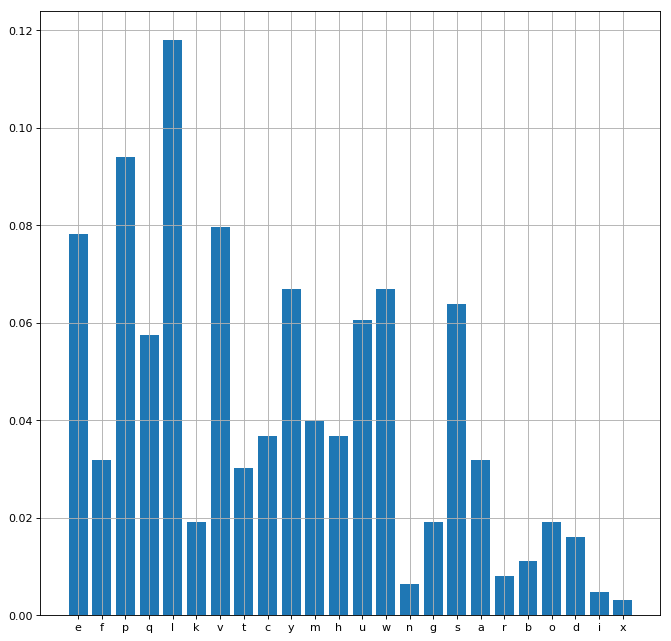

In [50]:
plt.figure(figsize=(10, 10), dpi=80)
letter, freq = zip(*Counter(task_04_encoded).items())
plt.bar(letter, np.array(freq) / len(task_04_encoded))
plt.grid()

In [51]:
task_04_encoded

'effpqlekvtvpcpyflmvhqluewcnvwfyghytcethqeklpvmsakspvpapvywmvhqluspqlywlaslfvwpqlmvhqluplrpsqlulqespblwpcsvrvwflhlwflwpuewfyotcmqyslwoywyethqeklpvmsakspvpapvywheppluwsgyulemqtlppluguyolwdtvsqethqeklpvpvsmtleupqepcyamewwyoyulultcywpqlseolsvohtluyapvwlygdalssvwdpqlnlckclrqeaspvilsleumqbqvmqcyahuykektcaslfpyflmvhqluhulivyasheueduehqbvttpqlvwflrygmyvwmvflwmlspvttbyunesesaddlspvywcyamewpucpyfvivflpqlolssedlvwheupskcpqlwaokluygmqeuemplusvwenlcewfehhtcgulxalwmcewetcsvspylemqygpqlomewcyagvwfebecpyaslqvdqluyuflugulxalwmcspepvspvmsbvpqpqvspchlygmvhqlupqlwlrpheueduehqmywpevwssyolhulppcvwplulspvwdvwgyuoepvywekyapsyoleffvpvywetulbeuf'

In [52]:
def substitution_cipher_decoder(s, decode_dict={}):
    return ''.join(decode_dict.get(x, '?') for x in s)

# Auto

In [ ]:
# !wget https://raw.githubusercontent.com/IlyaSemenov/wikipedia-word-frequency/master/results/enwiki-20150602-words-frequency.txt


In [187]:
N_GRAMS_SIZES = (1, 2, 3, 4, 5, 6)

In [188]:
def get_n_grams(n_grams=N_GRAMS_SIZES, limit=None): 
    word_frequency = pd.read_csv('enwiki-20150602-words-frequency.txt', sep=' ', header=None)
    
    word_frequency.fillna(' ', inplace=True)
    word_frequency[0] = word_frequency[0].map(str.lower)
    word_frequency[1] = word_frequency[1] / word_frequency[1].sum()
    
    if limit:
        word_frequency = word_frequency.iloc[:limit]

    grams_sums = defaultdict(float)
    grams_count = defaultdict(int)
    
    for _, row in tqdm(word_frequency.iterrows(), total=word_frequency.shape[0]):
        word, prob = row[0], row[1]
        
        for gram_len in n_grams:
            for i in range(len(word) - gram_len + 1):
                key = word[i:(i + gram_len)]

                if not all(x in ALPHA for x in key):
                    continue

                grams_sums[key] += prob
                grams_count[key] += 1

    gram_weights = {
        k: grams_sums[k] / grams_count[k] 
        for k in grams_count.keys()
    }
    
    return gram_weights

grams_prob = get_n_grams()

In [189]:
def subtitution_decode_score(s, n_grams, grams_prob):
    score = 0.
    
    for t, gram_len in enumerate(n_grams):
        for i in range(len(s) - gram_len + 1):
            score += grams_prob.get(s[i:(i + gram_len)], 0.)
            
    return score

In [190]:
def init_mapping():
    decodeset = set(_aplhas)
    mapping = {}
    
    for c in set(_aplhas):
        decode = np.random.choice(list(decodeset))        
        decodeset.remove(decode)
        
        mapping[c] = decode
    
    return mapping


def update_mapping(mapping, key, new_value):
    value_key = [k for k, v in mapping.items() if v == new_value][0]
    mapping[key], mapping[value_key] =  mapping[value_key], mapping[key]
    
    return mapping

In [191]:
def init_population(s, n_top_symbols):
    top_symbols = 'etaoinsrhdluc'
    
    if n_top_symbols > len(top_symbols):
        raise ValueError
        
    top_symbols = top_symbols[:n_top_symbols]
    top_symbols_perm = [''.join(p) for p in permutations(top_symbols)]
    
    top_symbols_in_s = ''.join([x[0] for x in sorted(Counter(s).items(), key=lambda x: -x[-1])])[:n_top_symbols]
    
    population = [
        init_mapping()
        for _ in range(len(top_symbols_perm))
    ]
    
    for i in range(len(population)):
        for c1, c2 in zip(top_symbols_in_s, top_symbols_perm[i]):
            update_mapping(population[i], c1, c2)
            
    return population

In [197]:
def softmax(x):
    x = np.array(x)
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)


def crossover(dicts, scores, population_size):
    probas = softmax(scores)
    probas = np.cumsum(probas)
    population = []
    
    for _ in range(population_size):
        # get parents based on scores
        x, y = dicts[bisect_left(probas, np.random.rand())], dicts[bisect_left(probas, np.random.rand())]
        child = x.copy()
        
        for k in child.keys():
            update_mapping(child, k, np.random.choice([x, y])[k])
            
        population.append(child)
        
    return population


def mutate(dicts, mutation_proba=0.25):
    for i in range(len(dicts)):
        while np.random.rand() < mutation_proba:
            idx1 = np.random.choice(list(_aplhas))
            idx2 = np.random.choice(list(_aplhas))
            
            update_mapping(dicts[i], idx1, idx2)
                

    return dicts

In [200]:
def genetic_algo(
    s, 
    n_top_symbols_init, 
    n_grams_size, 
    grams_prob, 
    patience=50, 
    crossover_popilation_fraction=0.75,
    max_iters=500):
    
    LOGGER.info(f"Getted encoded string: {s}")
    LOGGER.info('Applying genetic algorithm to hack substitution encription')
    
    population = init_population(s, n_top_symbols_init)
    LOGGER.info(f'Size of generated solutions population is {len(population)}')
    
    best_score = -1
    best_dict = None
    _patience = patience
    
    while max_iters:
        scores = [
            subtitution_decode_score(
                s=substitution_cipher_decoder(s, decode_dict=x),
                n_grams=n_grams_size, 
                grams_prob=grams_prob,
            )
            for x in population
        ]
        
        indexes = np.argsort(scores)
        
        if scores[indexes[-1]] <= best_score:
            if  _patience  == 0 :
                LOGGER.info(f'Metric stopped improve!')
                break
            else:
                if  scores[indexes[-1]] == best_score:
                    best_dict = population[indexes[-1]]
                    
                _patience -= 1
           
        else:
            _patience = patience

        best_score = scores[indexes[-1]]
        best_dict = population[indexes[-1]]
                
        indexes = indexes[int(len(scores) * crossover_popilation_fraction):]
        
        population = crossover([population[i] for i in indexes], 
                               [scores[i] for i in indexes],
                               len(population))
        population = mutate(population)
        max_iters -= 1
        
    LOGGER.info('Done with solution search')
    best_decode = " ".join(wordninja.split(substitution_cipher_decoder(s, decode_dict=best_dict)))
    LOGGER.info(f'Best decode: {best_decode}')
        
    return best_dict

In [201]:
genetic_algo(
    s=task_04_encoded, 
    n_top_symbols_init=6, # = population size of 6!
    n_grams_size=N_GRAMS_SIZES,
    grams_prob=grams_prob,
)

2018-09-30 23:08:21,687 - (crypto) - [INFO] - Getted encoded string: effpqlekvtvpcpyflmvhqluewcnvwfyghytcethqeklpvmsakspvpapvywmvhqluspqlywlaslfvwpqlmvhqluplrpsqlulqespblwpcsvrvwflhlwflwpuewfyotcmqyslwoywyethqeklpvmsakspvpapvywheppluwsgyulemqtlppluguyolwdtvsqethqeklpvpvsmtleupqepcyamewwyoyulultcywpqlseolsvohtluyapvwlygdalssvwdpqlnlckclrqeaspvilsleumqbqvmqcyahuykektcaslfpyflmvhqluhulivyasheueduehqbvttpqlvwflrygmyvwmvflwmlspvttbyunesesaddlspvywcyamewpucpyfvivflpqlolssedlvwheupskcpqlwaokluygmqeuemplusvwenlcewfehhtcgulxalwmcewetcsvspylemqygpqlomewcyagvwfebecpyaslqvdqluyuflugulxalwmcspepvspvmsbvpqpqvspchlygmvhqlupqlwlrpheueduehqmywpevwssyolhulppcvwplulspvwdvwgyuoepvywekyapsyoleffvpvywetulbeuf

2018-09-30 23:08:21,688 - (crypto) - [INFO] - Applying genetic algorithm to hack substitution encription

2018-09-30 23:08:21,815 - (crypto) - [INFO] - Size of generated solutions population is 720

2018-09-30 23:09:46,893 - (crypto) - [INFO] - Metric stopped improve!

2018-09-30 23:09:46,893 - (crypt

{'r': 'x',
 'm': 'c',
 'u': 'r',
 'q': 'h',
 'd': 'g',
 'h': 'p',
 'n': 'k',
 'v': 'i',
 'w': 'n',
 'l': 'e',
 'x': 'q',
 't': 'l',
 'z': 'z',
 'b': 'w',
 'c': 'y',
 'k': 'b',
 'i': 'v',
 'y': 'o',
 'j': 'j',
 'e': 'a',
 'a': 'u',
 's': 's',
 'f': 'd',
 'o': 'm',
 'p': 't',
 'g': 'f'}

In [ ]:
dict_guess = {'Y': 'O',
 'J': 'Z',
 'O': 'M',
 'W': 'N',
 'L': 'E',
 'D': 'G',
 'N': 'K',
 'K': 'B',
 'I': 'V',
 'A': 'U',
 'H': 'P',
 'Z': 'J',
 'R': 'X',
 'S': 'S',
 'G': 'F',
 'Q': 'H',
 'B': 'W',
 'P': 'T',
 'T': 'L',
 'F': 'D',
 'X': 'Q',
 'E': 'A',
 'V': 'I',
 'C': 'Y',
 'U': 'R',
 'M': 'C'}
" ".join(wordninja.split(substitution_cipher_decoder(task_04_encoded, dict_guess)))